## 決策樹基本建模流程

from sklearn import tree  # 導入所需的模組

clf = tree.DecisionTreeClassifier()  # 實例化

clf = clf.fit(X_train,y_train)  # 用訓練數據集訓練模型

result = clf.score(X_test,y_test) # 導入測試數據集, 從接口中調用需要的訊息(評估指標: 預設accuracy)

### 建立一棵分類決策樹

Step 1. 導入所需的模組與庫

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

Step 2. 導入紅酒數據集並查看資料集

In [2]:
wine = load_wine()

In [3]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
wine.data  # 特徵

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target  # 標籤

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
# 如果wine是一張表，應該長這樣：
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)  # 特徵, 標籤, 切分比例

In [10]:
Xtrain.shape

(124, 13)

In [11]:
wine.data.shape

(178, 13)

Step 3. 實例化模型、訓練模型以及評估模型

In [85]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

In [86]:
# score會因隨機劃分train, test而有差異
# 若不固定random_state則每次優化最低不純度所選特徵會改變, 每次得出的score也會不同
score

0.9629629629629629

Step 4. 圖像化決策樹

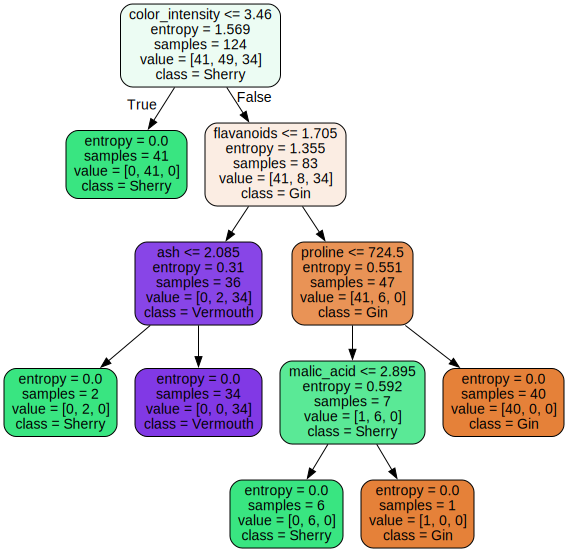

In [75]:
feature_name = ['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline']

import graphviz

dot_data = tree.export_graphviz(clf, 
                                feature_names = feature_name, 
                                class_names=["Gin", "Sherry", "Vermouth"], 
                                filled=True, 
                                rounded=True)

graph = graphviz.Source(dot_data)
graph

Step 5. 查看決策樹中哪些特徵有被使用到

In [140]:
# 使用feature_importances_這個屬性
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.05727389, 0.        ,
       0.        , 0.38781184, 0.        , 0.        , 0.4218168 ,
       0.02128689, 0.        , 0.11181058])

In [141]:
# 現在這棵樹的特徵重要性(未固定random_state)
[*zip(feature_name, clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.05727389415900658),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.3878118351797122),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.4218167954135755),
 ('hue', 0.02128689173421899),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.11181058351348677)]

In [78]:
# 前一棵樹的特徵重要性(未固定random_state)
# list(zip(feature_name, clf.feature_importances_))
[*zip(feature_name, clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.02128689173421899),
 ('ash', 0.05727389415900658),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.3878118351797122),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.4218167954135755),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.11181058351348677)]

### random_state & splitter

創建一顆新的決策樹, 固定random_state

In [104]:
clf_r = tree.DecisionTreeClassifier(criterion='entropy', random_state=36)
clf_r = clf_r.fit(Xtrain, Ytrain)
score_r = clf_r.score(Xtest, Ytest)

score_r

0.9259259259259259

創建一顆新的決策樹, 固定random_state;設定splitter=random 讓分枝時更隨機(增加隨機性)以降低過擬合情況發生

In [116]:
clf_s = tree.DecisionTreeClassifier(criterion="entropy", 
                                  random_state=36, 
                                  splitter="random"
                                 )
clf_s = clf_s.fit(Xtrain, Ytrain)
score_s = clf_s.score(Xtest, Ytest)
score_s

0.9074074074074074

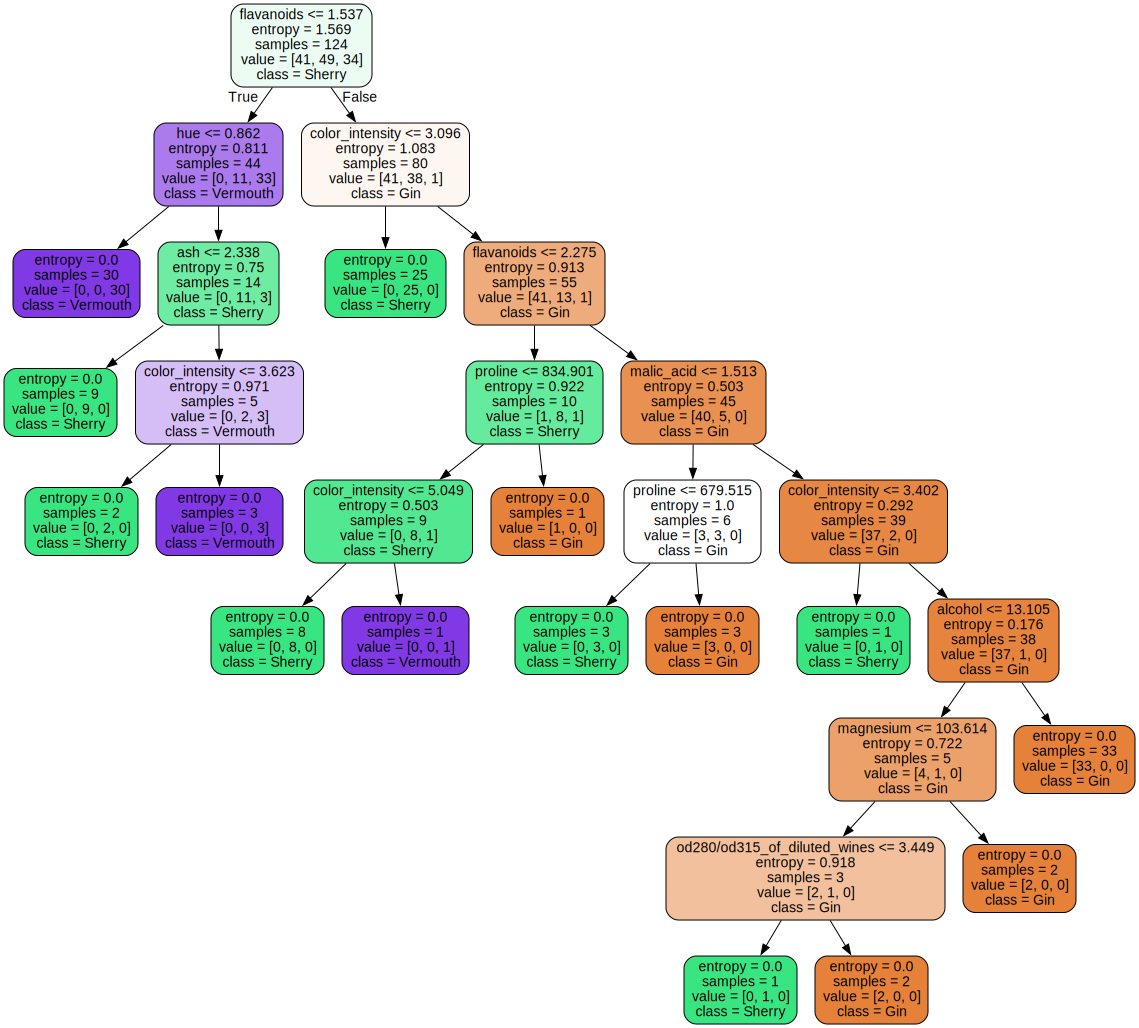

In [117]:
dot_data_s = tree.export_graphviz(clf_s, 
                                feature_names = feature_name, 
                                class_names=["Gin", "Sherry", "Vermouth"], 
                                filled=True, 
                                rounded=True)

graph_s = graphviz.Source(dot_data_s)
graph_s

In [111]:
# 此決策樹隊訓練集的擬合程度, 配合test的score可以判斷現在的決策樹的分類效果
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

In [112]:
score_train_s = clf_s.score(Xtrain, Ytrain)
score_train_s

1.0

### 剪枝策略

max_depth, 原 test score: 0.9074074074074074

In [121]:
clf_s2 = tree.DecisionTreeClassifier(criterion="entropy", 
                                    random_state=36, 
                                    splitter="random",
                                    max_depth=3,
                                    )
clf_s2 = clf_s2.fit(Xtrain, Ytrain)
score_s2 = clf_s2.score(Xtest, Ytest)
score_s2

0.9444444444444444

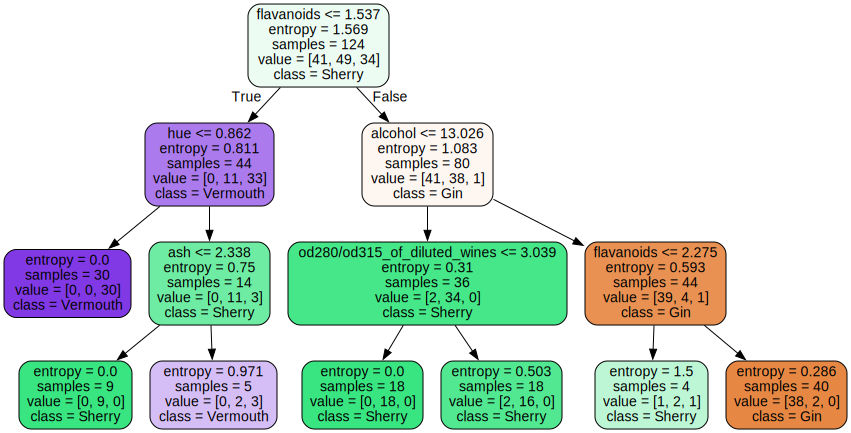

In [122]:
dot_data_s2 = tree.export_graphviz(clf_s2, 
                                feature_names = feature_name, 
                                class_names=["Gin", "Sherry", "Vermouth"], 
                                filled=True, 
                                rounded=True)

graph_s2 = graphviz.Source(dot_data_s2)
graph_s2

min_samples_leaf, 原 test score: 0.9074074074074074

In [123]:
clf_s2 = tree.DecisionTreeClassifier(criterion="entropy", 
                                    random_state=36, 
                                    splitter="random",
                                    max_depth=3,
                                    min_samples_leaf=10
                                 )
clf_s2 = clf_s2.fit(Xtrain, Ytrain)
score_s2 = clf_s2.score(Xtest, Ytest)
score_s2

0.8703703703703703

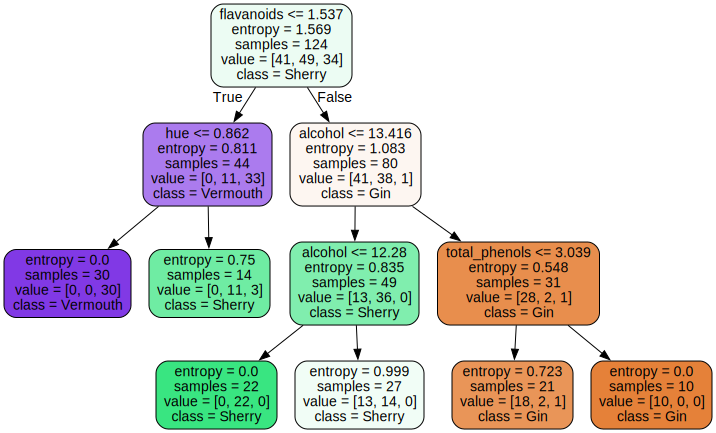

In [124]:
dot_data_s2 = tree.export_graphviz(clf_s2, 
                                feature_names = feature_name, 
                                class_names=["Gin", "Sherry", "Vermouth"], 
                                filled=True, 
                                rounded=True)

graph_s2 = graphviz.Source(dot_data_s2)
graph_s2

min_samples_split, 原 test score: 0.9074074074074074

In [127]:
clf_s2 = tree.DecisionTreeClassifier(criterion="entropy", 
                                    random_state=36, 
                                    splitter="random",
                                    max_depth=3,
                                    min_samples_leaf=10, 
                                    min_samples_split=35
                                 )
clf_s2 = clf_s2.fit(Xtrain, Ytrain)
score_s2 = clf_s2.score(Xtest, Ytest)
score_s2

0.8703703703703703

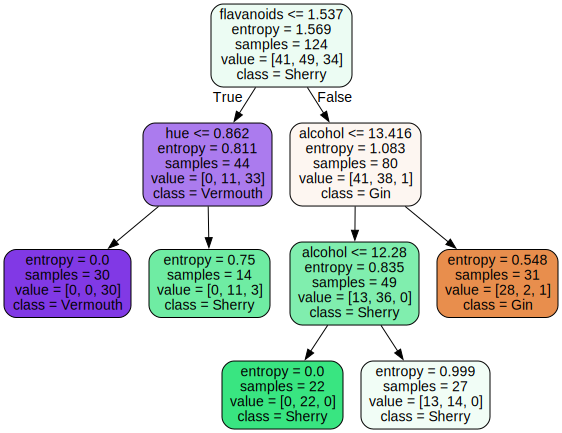

In [128]:
dot_data_s2 = tree.export_graphviz(clf_s2, 
                                feature_names = feature_name, 
                                class_names=["Gin", "Sherry", "Vermouth"], 
                                filled=True, 
                                rounded=True)

graph_s2 = graphviz.Source(dot_data_s2)
graph_s2

max_features, 直接限制特徵數量而強行使決策樹停下來; 但在不確定各個特徵的重要性之下, 如果希望透過降維的方式防止過擬合, 建議使用PCA, ICA等降維算法

min_impurity_decrease, 限制信息增益的大小，信息增益小於設定數值的分枝不會產生

In [133]:
clf_s2 = tree.DecisionTreeClassifier(criterion="entropy", 
                                    random_state=36, 
                                    splitter="random",
                                    max_depth=3,
                                    )
clf_s2 = clf_s2.fit(Xtrain, Ytrain)
score_s2 = clf_s2.score(Xtest, Ytest)
score_s2

0.9444444444444444

畫圖輔助尋找最優max_depth參數

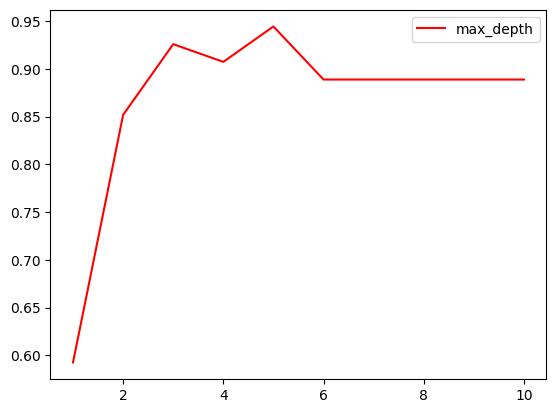

In [139]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf_s2 = tree.DecisionTreeClassifier(max_depth=i+1, 
                                         criterion="entropy", 
                                         random_state=30, 
                                         splitter="random"
                                         )
    clf_s2 = clf_s2.fit(Xtrain, Ytrain)
    score_s2 = clf_s2.score(Xtest, Ytest)
    test.append(score_s2)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [137]:
#apply返回每個測試樣本所在的葉子節點的索引

clf_s2.apply(Xtest)

array([12,  4, 28,  4,  4, 28, 12,  4, 16, 16, 16,  4, 18, 27, 18, 16, 16,
       16, 28, 28, 28, 12, 16, 28, 16,  4,  4, 28, 28, 26,  4, 28, 28,  8,
       28, 19,  4, 28, 12, 28, 26, 27,  9, 28, 16,  4,  4, 16, 28, 28, 16,
       28, 16, 12], dtype=int64)

In [138]:
#predict返回每個測試樣本的分類/回歸结果
clf.predict(Xtest)

array([1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       1, 2, 2, 1, 0, 0, 1, 0, 1, 2])